In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/proceed/Clean_data.csv')
data.head()

C:\Users\Warin\AppData\Local\Temp\ipykernel_21776\3359318555.py:1: DtypeWarning: Columns (2,4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/proceed/Clean_data.csv')


,accounting_date,company_code,customer_code,customer_district_code,item_code,business_chain_l1_name,salesperson_code,market_segment,value_sales,value_cost,...,business_chain_l1_code_ZZ1,business_chain_l1_code_ZZ2,contact_method_code_Other,order_type_code_NOR,order_type_code_Other,Profit,Unit_Price,Profit_Margin,Transformed_Profit,Transformed_Unit_Price
0,2012-05-09,101,411800601,410,GENIE8WWWBC,ElectraCorp Ltd,T612,Commercial & Industrial,218.40,178.1976,...,False,False,False,True,False,40.2024,2.60,18.407692,6.340536,1.280934
1,2012-02-16,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,38.28,25.4568,...,False,False,False,True,False,12.8232,3.19,33.498433,3.580950,1.432701
2,2012-05-09,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,40.20,25.4568,...,False,False,False,True,False,14.7432,3.35,36.674627,3.839687,1.470176
3,2012-05-18,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,20.10,12.7284,...,False,False,False,False,False,7.3716,3.35,36.674627,2.715069,1.470176
4,2012-01-09,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,19.14,12.7284,...,False,False,False,False,False,6.4116,3.19,33.498433,2.532114,1.432701


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971500 entries, 0 to 1971499
Data columns (total 85 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   accounting_date                         object 
 1   company_code                            int64  
 2   customer_code                           object 
 3   customer_district_code                  int64  
 4   item_code                               object 
 5   business_chain_l1_name                  object 
 6   salesperson_code                        object 
 7   market_segment                          object 
 8   value_sales                             float64
 9   value_cost                              float64
 10  value_quantity                          float64
 11  value_price_adjustment                  int64  
 12  currency                                object 
 13  invoice_number                          int64  
 14  line_number                       

<Axes: xlabel='value_sales', ylabel='Count'>

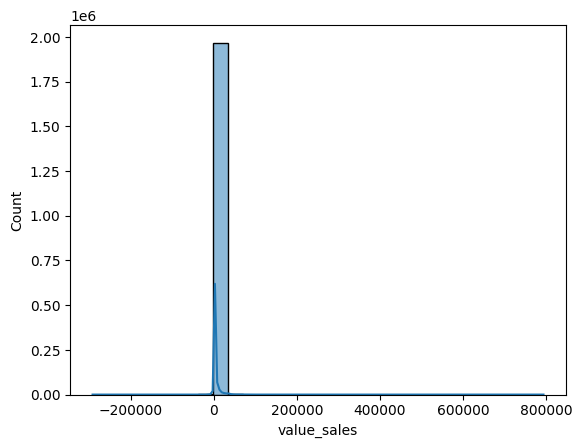

In [4]:
sns.histplot(data=data, x='value_sales', bins=30, kde=True)

In [5]:
#create daily sale
filtered_data = data[['order_date', 'value_sales']]
#change order_date to datetime
filtered_data['order_date'] = pd.to_datetime(filtered_data['order_date'])
#posive value sales
filtered_data = filtered_data[filtered_data['value_sales'] >= 0]
#create daily sale
daily_sale = filtered_data.groupby('order_date')['value_sales'].sum().reset_index()
#filter date between 2012 and 2013
daily_sale = daily_sale[(daily_sale['order_date'] >= '2012-01-01') & (daily_sale['order_date'] <= '2013-12-31')]
#interpolate missing date
daily_sale = daily_sale.set_index('order_date').resample('D').sum().reset_index()
#fill missing value
daily_sale['value_sales'] = daily_sale['value_sales'].fillna(0)
daily_sale

C:\Users\Warin\AppData\Local\Temp\ipykernel_21776\3731725066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['order_date'] = pd.to_datetime(filtered_data['order_date'])


,order_date,value_sales
0,2012-01-01,325.2000
1,2012-01-02,44819.3620
2,2012-01-03,659479.3300
3,2012-01-04,608059.4060
4,2012-01-05,342315.6920
...,...,...
725,2013-12-26,278.6000
726,2013-12-27,8976.7500
727,2013-12-28,0.0000
728,2013-12-29,0.0000


we calculated daily sales and fill the missing date with 0

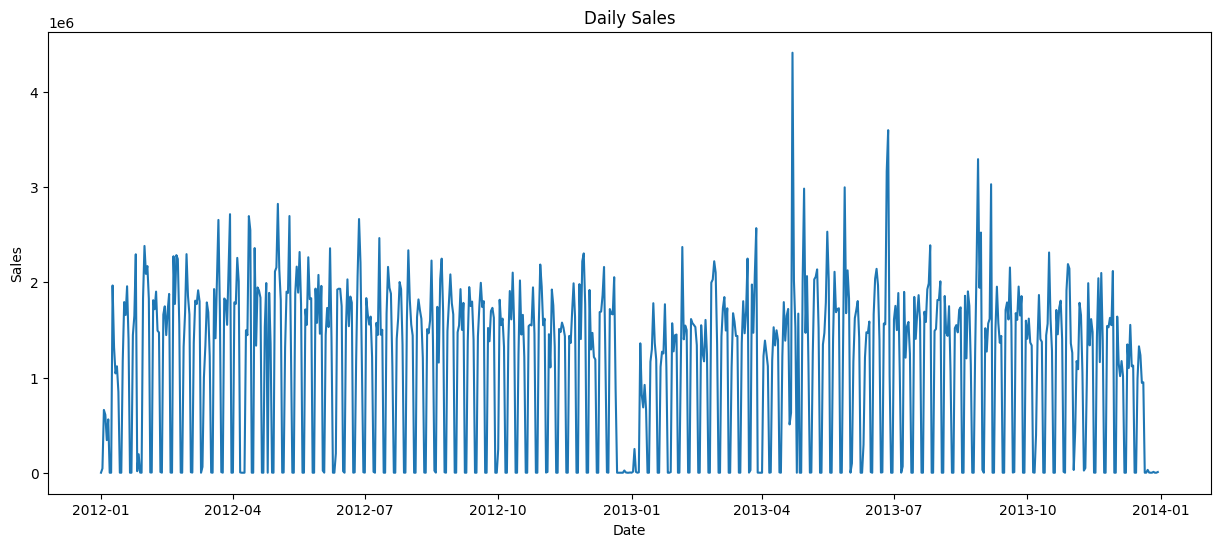

In [6]:
#plot daily sale
plt.figure(figsize=(15, 6))
plt.plot(daily_sale['order_date'], daily_sale['value_sales'])
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


from the sales data i assume that it has 0 sales on weekend and holiday because it is a B2B sales

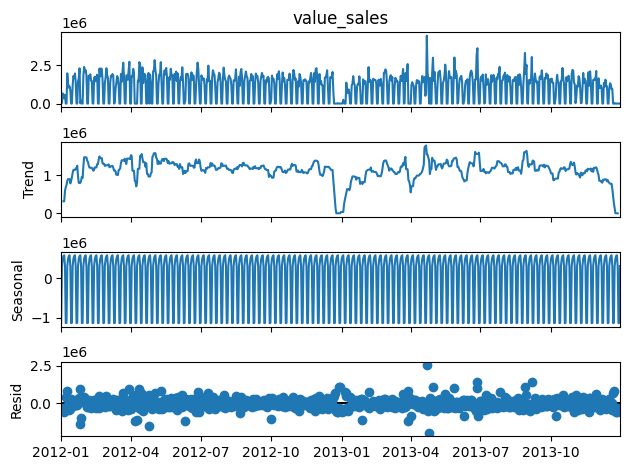

In [7]:
#decompose time series
from statsmodels.tsa.seasonal import seasonal_decompose
daily_sale = daily_sale.set_index('order_date')
result = seasonal_decompose(daily_sale['value_sales'], model='additive')
result.plot()
plt.show()

This chart is a time series decomposition plot for the variable `value_sales`, using an additive decomposition approach. The chart is split into four components, each representing a different aspect of the `value_sales` time series:

1. **Observed**: The top plot shows the actual `value_sales` over time, capturing all components (trend, seasonality, and residuals) together. This gives an overall view of the fluctuations and patterns in sales from 2012 to late 2013.

2. **Trend**: The second plot reveals the underlying trend in `value_sales` by smoothing out the short-term fluctuations. It shows a slight upward trend in 2012, followed by a more irregular pattern with some dips in early 2013. Toward the end, there seems to be a downward movement, potentially reflecting a decline in sales.

3. **Seasonal**: The third plot highlights the seasonal patterns in `value_sales`, capturing any repeating cycles. This regular pattern suggests there are consistent periodic fluctuations within each year, which might be tied to monthly or quarterly variations in demand, possibly related to seasonality in lighting bulb sales.

4. **Residual**: The bottom plot displays the residuals, which are the remaining values after removing the trend and seasonality. Ideally, these should appear random if the decomposition has successfully captured the trend and seasonality. However, we see some outliers and variability, particularly around early 2013, indicating periods where the model’s expected values diverged from the actual sales data.

This decomposition helps identify whether the variations in `value_sales` are due to consistent seasonal patterns, a general trend, or irregular/random fluctuations. It can be useful for understanding patterns in sales, especially if the goal is to make forecasts or explore factors influencing sales trends.

c:\Users\Warin\anaconda3\envs\BUSA8000\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Warin\anaconda3\envs\BUSA8000\lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\Warin\anaconda3\envs\BUSA8000\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


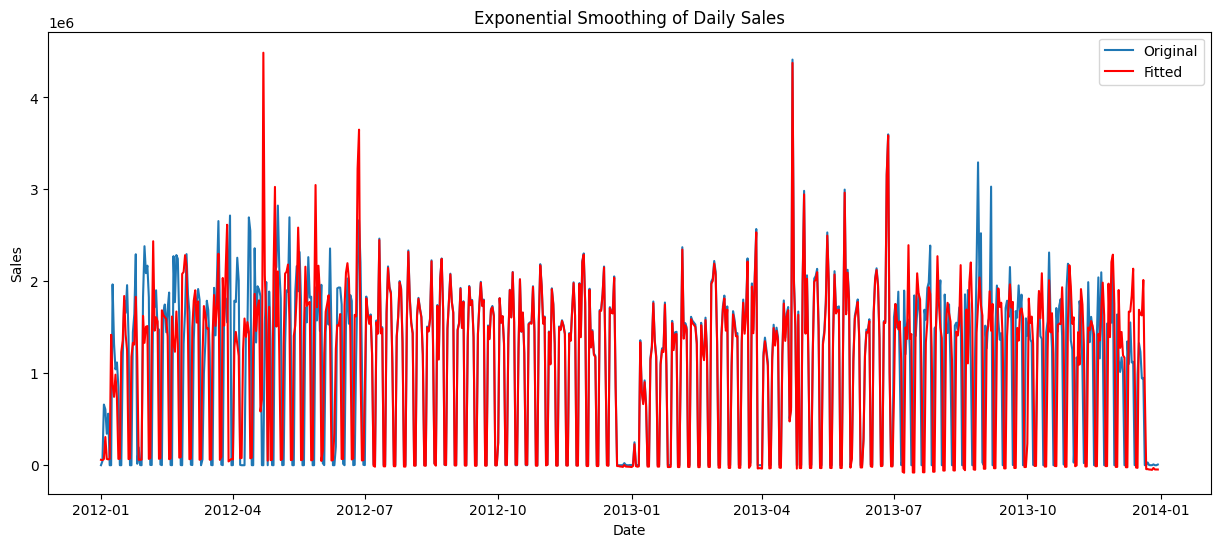

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply exponential smoothing
model = ExponentialSmoothing(daily_sale['value_sales']+1, trend='mul', seasonal='add', seasonal_periods=365) # Add 1 to avoid taking log of 0
fit = model.fit()

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(daily_sale.index, daily_sale['value_sales'], label='Original')
plt.plot(daily_sale.index, fit.fittedvalues, label='Fitted', color='red')
plt.title('Exponential Smoothing of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
# save the plot
plt.savefig('../reports/figures/exponential_smoothing.png')
plt.show()

Holt-Winters exponential smoothing, also known as Triple Exponential Smoothing, is a forecasting method used for time series data that accounts for trend and seasonality. This technique is ideal for data with both a trend and seasonal variation, making it commonly used in inventory management, sales forecasting, and other areas with cyclical patterns.

There are three main components to Holt-Winters:

1. **Level** \((L_t)\): The baseline value of the series at a given time.
2. **Trend** \((T_t)\): The change in the series over time.
3. **Seasonality** \((S_t)\): The repetitive seasonal pattern within the data.

The model has two types:

- **Additive**: When the seasonal variations are roughly constant over time.
- **Multiplicative**: When the seasonal variations grow proportionally to the trend.

### Holt-Winters Equations

For the additive model, the equations are:

1. **Level**: \(L_t = \alpha (y_t - S_{t-m}) + (1 - \alpha)(L_{t-1} + T_{t-1})\)
2. **Trend**: \(T_t = \beta (L_t - L_{t-1}) + (1 - \beta)T_{t-1}\)
3. **Seasonality**: \(S_t = \gamma (y_t - L_t) + (1 - \gamma)S_{t-m}\)
4. **Forecast** for \(k\) periods ahead: \(\hat{y}_{t+k} = L_t + kT_t + S_{t+k-m}\)

where:
- \(y_t\): Actual value at time \(t\)
- \(\alpha\), \(\beta\), \(\gamma\): Smoothing parameters (0 < \(\alpha\), \(\beta\), \(\gamma\) < 1)
- \(m\): Number of periods in a season (e.g., 12 for monthly data with yearly seasonality)


In [9]:
# evaluate model
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions
predictions = fit.fittedvalues
#replace negative value with 0
predictions[predictions < 0] = 0

# Calculate RMSE
rmse = sqrt(mean_squared_error(daily_sale['value_sales'], predictions))
print(f"root mean squared error = {rmse:,.2f}")
# Calculate MAE
mae = np.mean(np.abs(daily_sale['value_sales'] - predictions))
print(f"mean absolute error = {mae:,.2f}")
# Calculate MSE
mse = mean_squared_error(daily_sale['value_sales'], predictions)
print(f"mean squared error = {mse:,.2f}")
#R2 score
from sklearn.metrics import r2_score
r2 = r2_score(daily_sale['value_sales'], predictions)
print(f"R2 score = {r2:.2%}")


root mean squared error = 644,673.90
mean absolute error = 331,203.67
mean squared error = 415,604,435,887.42
R2 score = 42.37%


In [10]:
# Forecast the future
forecast = fit.forecast(steps=365)
forecast = pd.DataFrame(forecast, columns=['value_sales'])
forecast['order_date'] = pd.date_range(start='2014-01-01', periods=365)
forecast = forecast.set_index('order_date')
# replace negative value with 0
forecast['value_sales'] = forecast['value_sales'].apply(lambda x: 0 if x < 0 else x)
forecast

,value_sales
order_date,
2014-01-01,0.000000
2014-01-02,0.000000
2014-01-03,0.000000
2014-01-04,197871.158088
2014-01-05,0.000000
...,...
2014-12-27,0.000000
2014-12-28,0.000000
2014-12-29,0.000000


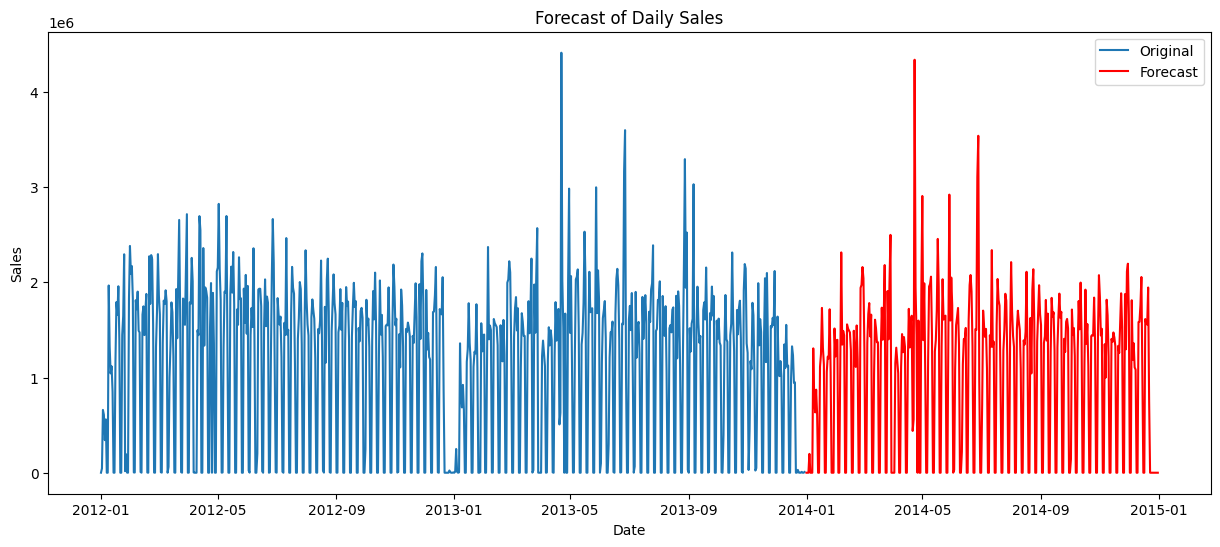

In [11]:
# Plot the forecast
plt.figure(figsize=(15, 6))
plt.plot(daily_sale.index, daily_sale['value_sales'], label='Original')
plt.plot(forecast.index, forecast['value_sales'], label='Forecast', color='red')
plt.title('Forecast of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
#save plot
plt.savefig('../reports/figures/forecast.png')
plt.show()


In [12]:
#print sum 2012 daily sale
print(f"sum 2012 daily sale = {daily_sale[daily_sale.index.year == 2012]['value_sales'].sum():,.2f} AUD")
#print sum 2013 daily sale
print(f"sum 2013 daily sale = {daily_sale[daily_sale.index.year == 2013]['value_sales'].sum():,.2f} AUD")
#print sum forecast
print(f"sum forecast = {forecast['value_sales'].sum():,.2f} AUD")

sum 2012 daily sale = 423,990,503.37 AUD
sum 2013 daily sale = 397,950,946.62 AUD
sum forecast = 382,886,737.63 AUD


# Monthly forecast

In [17]:
# create monthly sale
monthly_sale = daily_sale.resample('M').sum()
monthly_sale = monthly_sale.reset_index()
monthly_sale

C:\Users\Warin\AppData\Local\Temp\ipykernel_21776\1514905689.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sale = daily_sale.resample('M').sum()


,order_date,value_sales
0,2012-01-31,2.630926e+07
1,2012-02-29,3.836766e+07
2,2012-03-31,3.908568e+07
3,2012-04-30,3.429333e+07
4,2012-05-31,4.433829e+07
5,2012-06-30,3.618815e+07
6,2012-07-31,3.737509e+07
7,2012-08-31,3.868501e+07
8,2012-09-30,3.319137e+07
9,2012-10-31,3.646247e+07


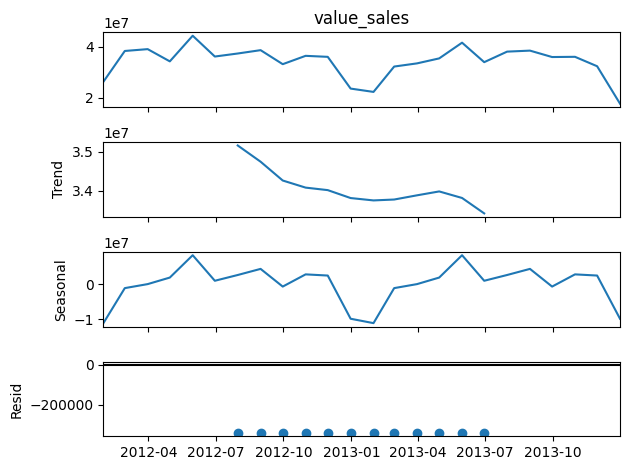

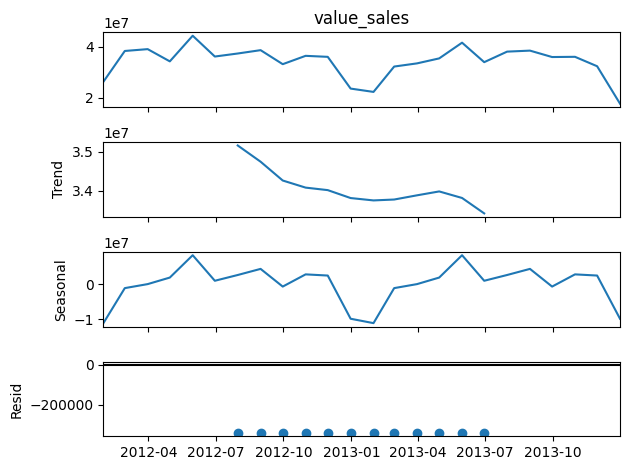

In [19]:
seasonal_decompose(monthly_sale.set_index('order_date')['value_sales'], model='additive').plot()

In [28]:
# Apply exponential smoothing
model = ExponentialSmoothing(monthly_sale['value_sales']+1, trend='add', seasonal='add', seasonal_periods=12) # Add 1 to avoid taking log of 0
fit = model.fit()


c:\Users\Warin\anaconda3\envs\BUSA8000\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


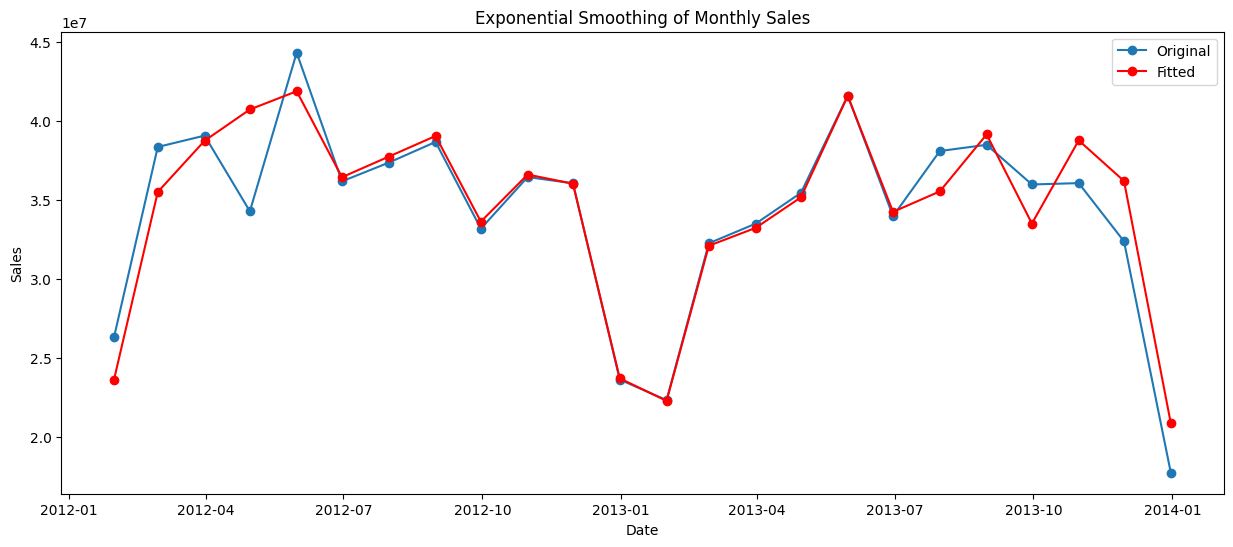

In [32]:
# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(monthly_sale['order_date'], monthly_sale['value_sales'], label='Original', marker='o')
plt.plot(monthly_sale['order_date'], fit.fittedvalues, label='Fitted', color='red', marker='o')
plt.title('Exponential Smoothing of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()


In [30]:
# forecast the future
forecast = fit.forecast(steps=12)
forecast = pd.DataFrame(forecast, columns=['value_sales'])
forecast['order_date'] = pd.date_range(start='2014-01-01', periods=12, freq='M')
forecast = forecast.set_index('order_date')
forecast


C:\Users\Warin\AppData\Local\Temp\ipykernel_21776\3808775544.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast['order_date'] = pd.date_range(start='2014-01-01', periods=12, freq='M')


,value_sales
order_date,
2014-01-31,1.704184e+07
2014-02-28,2.683233e+07
2014-03-31,2.784226e+07
2014-04-30,2.956879e+07
2014-05-31,3.577222e+07
2014-06-30,2.841327e+07
2014-07-31,2.992276e+07
2014-08-31,3.152833e+07
2014-09-30,2.639742e+07


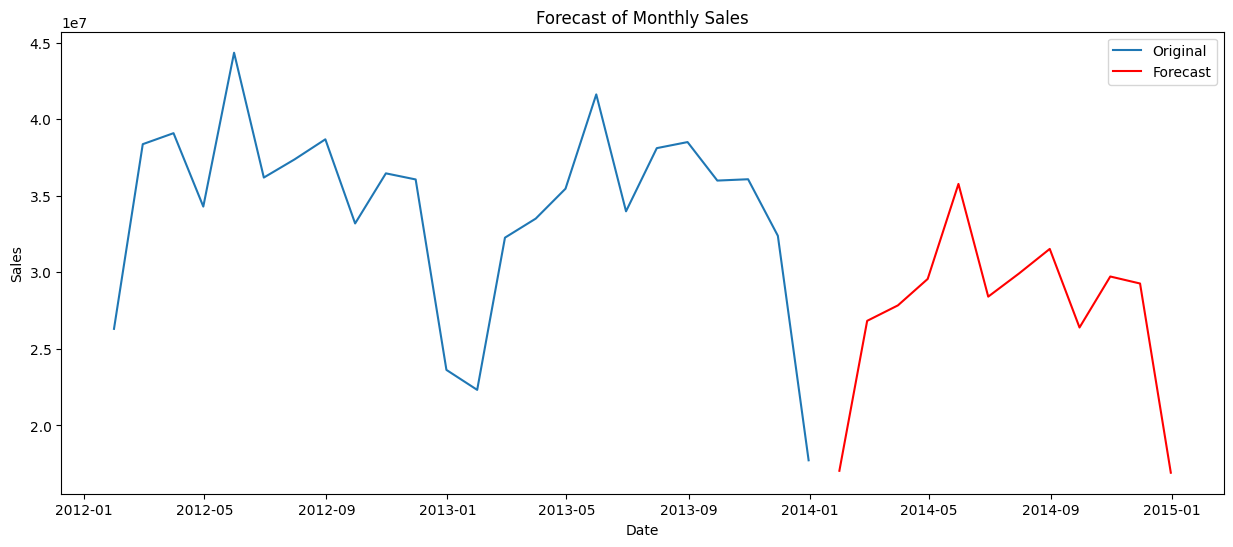

In [31]:
# Plot the forecast
plt.figure(figsize=(15, 6))
plt.plot(monthly_sale['order_date'], monthly_sale['value_sales'], label='Original')
plt.plot(forecast.index, forecast['value_sales'], label='Forecast', color='red')
plt.title('Forecast of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()


In [33]:
# Calculate evaluation metrics
# Make predictions
predictions = fit.fittedvalues
# Calculate RMSE
rmse = sqrt(mean_squared_error(monthly_sale['value_sales'], predictions))
print(f"root mean squared error = {rmse:,.2f}")
# Calculate MAE
mae = np.mean(np.abs(monthly_sale['value_sales'] - predictions))
print(f"mean absolute error = {mae:,.2f}")
# Calculate MSE
mse = mean_squared_error(monthly_sale['value_sales'], predictions)
print(f"mean squared error = {mse:,.2f}")
#R2 score
r2 = r2_score(monthly_sale['value_sales'], predictions)
print(f"R2 score = {r2:.2%}")


root mean squared error = 2,128,217.54
mean absolute error = 1,369,563.26
mean squared error = 4,529,309,906,725.95
R2 score = 87.63%


### Summary

This Jupyter Notebook performs a comprehensive analysis of sales data, focusing on time series analysis and forecasting. Below is a summary of the key steps and findings:

1. **Data Import and Initial Exploration**:
    - The dataset is imported from a CSV file and initial exploration is performed using `data.head()` and `data.info()` to understand the structure and content of the data.

2. **Data Visualization**:
    - A histogram of the `value_sales` column is plotted using Seaborn to visualize the distribution of sales values.

3. **Data Preprocessing**:
    - The dataset is filtered to include only relevant columns (`order_date` and `value_sales`).
    - The `order_date` column is converted to datetime format.
    - Negative sales values are removed.
    - Daily sales are calculated by grouping the data by `order_date` and summing the `value_sales`.
    - The data is filtered to include only dates between 2012 and 2013.
    - Missing dates are interpolated, and missing sales values are filled with 0.

4. **Daily Sales Plot**:
    - A line plot of daily sales is created to visualize the sales trend over time.

5. **Time Series Decomposition**:
    - The time series is decomposed into its components (trend, seasonality, and residuals) using an additive model. The decomposition plots are generated to analyze these components.

6. **Exponential Smoothing**:
    - Holt-Winters exponential smoothing is applied to the daily sales data to model and forecast future sales. The model accounts for both trend and seasonality.
    - The fitted values from the model are plotted alongside the original sales data.

7. **Model Evaluation**:
    - The model's performance is evaluated using the Root Mean Squared Error (RMSE) and R-squared (R²) metrics. The RMSE is calculated to be 644673.90, and the R² score is 0.42.

8. **Sales Forecasting**:
    - The model is used to forecast sales for the next year (2014). The forecasted values are plotted alongside the original sales data.
    - The total forecasted sales for 2014 are calculated and printed.

### Key Variables

- **daily_sale**: DataFrame containing daily sales data from 2012-01-01 to 2013-12-30.
- **data**: Original dataset containing detailed sales information.
- **filtered_data**: DataFrame containing filtered sales data with relevant columns and positive sales values.
- **fit**: Holt-Winters model fitted to the daily sales data.
- **forecast**: DataFrame containing forecasted sales values for 2014.
- **predictions**: Series containing the fitted values from the Holt-Winters model.
- **r2**: R-squared value of the model.
- **result**: Decomposition result of the time series.
- **rmse**: Root Mean Squared Error of the model.
- **mse**: Mean Squared Error of the model.
- **mae**: Mean Absolute Error.
